In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced


In [3]:
# Loading and preprocessing Data

In [4]:
# Loading data
file_path = Path("../apestogetherstrong/logistic_regression_test.csv")
df_equities = pd.read_csv(file_path)
df_equities.head()

,data_index,symbol,industry,sector,date,volume,volume_previousday,volume_greater_previousday,volume_deathIncrease_up,volume_hospitalizedIncrease_up,...,hospitalizedIncrease_greater_previousday,negativeIncrease,negativeIncrease_previousday,negativeIncrease_greater_previousday,positiveIncrease,positiveIncrease_previousday,positiveIncrease_greater_previousday,totalTestResultsIncrease,totalTestResultsIncrease_previousday,totalTestResultsIncrease_greater_previousday
0,0,A,Medical Specialties,Health Technology,8/20/2020,318382,1651518,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
1,1,AA,Aluminum,Non-Energy Minerals,8/20/2020,1543881,5460701,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
2,2,AAAU,Investment Trusts/Mutual Funds,Miscellaneous,8/20/2020,151621,584100,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
3,3,AACG,Miscellaneous Commercial Services,Commercial Services,8/20/2020,10963,36708,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1
4,4,AADR,Investment Trusts/Mutual Funds,Miscellaneous,8/20/2020,177,1191,0,0,0,...,0,208472,243232,0,43844,45073,0,864210,832115,1


In [5]:
df_equities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 44 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   data_index                                    623468 non-null  int64  
 1   symbol                                        623468 non-null  object 
 2   industry                                      623468 non-null  object 
 3   sector                                        623468 non-null  object 
 4   date                                          623468 non-null  object 
 5   volume                                        623468 non-null  int64  
 6   volume_previousday                            623468 non-null  int64  
 7   volume_greater_previousday                    623468 non-null  int64  
 8   volume_deathIncrease_up                       623468 non-null  int64  
 9   volume_hospitalizedIncrease_up                62

In [6]:
rf_df = pd.DataFrame().assign(symbol=df_equities['symbol'],date=df_equities['date'],high=df_equities['high'],iexClose=df_equities['iexClose'],deathIncrease=df_equities['deathIncrease'],negativeIncrease=df_equities['negativeIncrease'],positiveIncrease=df_equities['positiveIncrease'],totalTestResultsIncrease=df_equities['totalTestResultsIncrease'],high_positiveIncrease_up=df_equities['high_positiveIncrease_up'])
print(rf_df)

       symbol        date    high  iexClose  deathIncrease  negativeIncrease  \
0           A   8/20/2020  98.150    98.065           1129            208472   
1          AA   8/20/2020  15.120    14.965           1129            208472   
2        AAAU   8/20/2020  19.440    19.400           1129            208472   
3        AACG   8/20/2020   1.126     1.190           1129            208472   
4        AADR   8/20/2020  56.330    58.260           1129            208472   
...       ...         ...     ...       ...            ...               ...   
623463    ZVO  12/23/2020   4.270     4.130           3393            304962   
623464   ZYME  12/23/2020  53.700    51.030           3393            304962   
623465   ZYNE  12/23/2020   3.505     3.415           3393            304962   
623466   ZYXI  12/23/2020  14.490    13.820           3393            304962   
623467   TRUE  12/23/2020   4.610     4.505           3393            304962   

        positiveIncrease  totalTestResu

In [7]:
float or np.ndarray(dtype=float)
rf_df['date'] = pd.to_datetime(rf_df['date'])    
rf_df['date_delta'] = (rf_df['date'] - rf_df['date'].min())  / np.timedelta64(1,'D')
# converting to object
rf_df = rf_df.astype({"date":'int64'}) 

In [8]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   symbol                    623468 non-null  object 
 1   date                      623468 non-null  int64  
 2   high                      623468 non-null  float64
 3   iexClose                  623468 non-null  float64
 4   deathIncrease             623468 non-null  int64  
 5   negativeIncrease          623468 non-null  int64  
 6   positiveIncrease          623468 non-null  int64  
 7   totalTestResultsIncrease  623468 non-null  int64  
 8   high_positiveIncrease_up  623468 non-null  int64  
 9   date_delta                623468 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 47.6+ MB


In [9]:
rf_df = rf_df.drop(labels=["symbol", "date"], axis=1)
rf_df.head()



,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,high_positiveIncrease_up,date_delta
0,98.150,98.065,1129,208472,43844,864210,0,0.0
1,15.120,14.965,1129,208472,43844,864210,0,0.0
2,19.440,19.400,1129,208472,43844,864210,0,0.0
3,1.126,1.190,1129,208472,43844,864210,0,0.0
4,56.330,58.260,1129,208472,43844,864210,0,0.0


In [10]:
rf_df.tail()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,high_positiveIncrease_up,date_delta
623463,4.270,4.130,3393,304962,224526,1791481,1,125.0
623464,53.700,51.030,3393,304962,224526,1791481,0,125.0
623465,3.505,3.415,3393,304962,224526,1791481,1,125.0
623466,14.490,13.820,3393,304962,224526,1791481,1,125.0
623467,4.610,4.505,3393,304962,224526,1791481,1,125.0


In [11]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   high                      623468 non-null  float64
 1   iexClose                  623468 non-null  float64
 2   deathIncrease             623468 non-null  int64  
 3   negativeIncrease          623468 non-null  int64  
 4   positiveIncrease          623468 non-null  int64  
 5   totalTestResultsIncrease  623468 non-null  int64  
 6   high_positiveIncrease_up  623468 non-null  int64  
 7   date_delta                623468 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 38.1 MB


In [12]:
# Create our features
#X = pd.get_dummies(df_equities, columns=["death", "deathIncrease", "hospitalizedIncrease", "hospitalizedCurrently", "negative", "positive", "totalTestResults", "totalTestResultsIncrease"])
X = rf_df.drop('high_positiveIncrease_up',axis=1)
# Create our target
y = pd.DataFrame(rf_df["high_positiveIncrease_up"])
X.head()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_delta
0,98.150,98.065,1129,208472,43844,864210,0.0
1,15.120,14.965,1129,208472,43844,864210,0.0
2,19.440,19.400,1129,208472,43844,864210,0.0
3,1.126,1.190,1129,208472,43844,864210,0.0
4,56.330,58.260,1129,208472,43844,864210,0.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623468 entries, 0 to 623467
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   high                      623468 non-null  float64
 1   iexClose                  623468 non-null  float64
 2   deathIncrease             623468 non-null  int64  
 3   negativeIncrease          623468 non-null  int64  
 4   positiveIncrease          623468 non-null  int64  
 5   totalTestResultsIncrease  623468 non-null  int64  
 6   date_delta                623468 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 33.3 MB


In [14]:
X.describe()

,high,iexClose,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,date_delta
count,623468.000000,623468.000000,623468.000000,623468.000000,623468.000000,6.234680e+05,623468.000000
mean,41.163351,42.778524,1273.873418,250270.392405,100151.316456,1.282244e+06,62.164557
std,103.949506,104.890778,806.655191,124994.255672,68173.329913,4.011269e+05,35.269849
min,0.000000,0.007000,246.000000,-658774.000000,22310.000000,5.468590e+05,0.000000
25%,7.580000,9.180000,847.000000,211097.000000,43642.000000,9.504830e+05,33.000000
50%,21.680000,22.920000,1047.000000,263255.000000,63430.000000,1.182695e+06,61.000000
75%,42.739250,44.160000,1358.000000,304962.000000,166503.000000,1.653269e+06,91.000000
max,4530.000000,4474.000000,3453.000000,456078.000000,236933.000000,2.010951e+06,125.000000


In [15]:
# Check the balance of our target values
y['high_positiveIncrease_up'].value_counts()

0    417157
1    206311
Name: high_positiveIncrease_up, dtype: int64

In [16]:
y.head()

,high_positiveIncrease_up
0,0
1,0
2,0
3,0
4,0


In [17]:
# Check the balance of our target values
y['high_positiveIncrease_up'].value_counts(normalize=True)

0    0.669091
1    0.330909
Name: high_positiveIncrease_up, dtype: float64

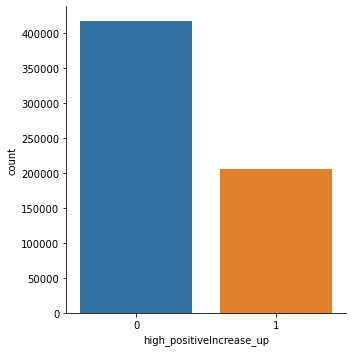

In [18]:
import seaborn as sn
sn.factorplot('high_positiveIncrease_up', data=y,kind='count')

In [19]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [20]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
# Create a random forest classifier.
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit
brf_model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [21]:
# Fitting the model
predictions = brf_model.predict(X_test)
balanced_accuracy_score(y_test, predictions)

0.7444915254478338

In [23]:
# Display the confusion matrix
confusion_matrix(y_test, predictions)

array([[75159, 32307],
       [ 8330, 40071]], dtype=int64)

In [24]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.70      0.83      0.79      0.76      0.57    107466
          1       0.55      0.83      0.70      0.66      0.76      0.59     48401

avg / total       0.79      0.74      0.79      0.75      0.76      0.58    155867



In [25]:
# Calculate feature importance in the Random Forest model.
importances = brf_model.feature_importances_
importances

array([0.33186056, 0.28496936, 0.14547552, 0.07067753, 0.06199269,
       0.05303948, 0.05198486])

In [26]:
# We can sort the features by their importance.
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.3318605573087507, 'high'),
 (0.28496935968715936, 'iexClose'),
 (0.14547551925904784, 'deathIncrease'),
 (0.0706775319935125, 'negativeIncrease'),
 (0.06199268782956306, 'positiveIncrease'),
 (0.05303948236439628, 'totalTestResultsIncrease'),
 (0.051984861557570296, 'date_delta')]

In [27]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.70      0.83      0.79      0.76      0.57    107466
          1       0.55      0.83      0.70      0.66      0.76      0.59     48401

avg / total       0.79      0.74      0.79      0.75      0.76      0.58    155867

